# Tarea 2 | Pregunta 1 | Aprendizaje Estadístico y Computacional
---
#### Luciano Davico
#### Richard Orellana

## Caso 1: Dataset 'ozone'

Importamos el dataset 'ozone'

In [4]:
!pip install faraway


[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python3.11 -m pip install --upgrade pip


Importamos las librerías

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (accuracy_score, recall_score, precision_score, f1_score,
    roc_auc_score, confusion_matrix
)
from sklearn.preprocessing import StandardScaler
from faraway.datasets import ozone

Creamos el DF

In [7]:
ozone_df = ozone.load()
ozone_df

,O3,vh,wind,humidity,temp,ibh,dpg,ibt,vis,doy
0,3,5710,4,28,40,2693,-25,87,250,33
1,5,5700,3,37,45,590,-24,128,100,34
2,5,5760,3,51,54,1450,25,139,60,35
3,6,5720,4,69,35,1568,15,121,60,36
4,4,5790,6,19,45,2631,-33,123,100,37
...,...,...,...,...,...,...,...,...,...,...
325,8,5630,4,50,50,2851,-5,100,70,384
326,2,5730,3,53,51,111,-14,225,200,387
327,3,5690,3,23,51,5000,-36,107,70,388
328,5,5650,3,61,50,3704,18,83,40,389


### Pregunta 1: Descomposición del Dataset

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Supongamos que ya tienes un DataFrame llamado 'ozone_df' con las variables explicativas y 'O3' como la variable respuesta

# Definir la variable respuesta (Y) y las variables explicativas (X)
Y = ozone_df['O3']
X = ozone_df.drop(columns=['O3'])  # Mantener todas las variables explicativas

# Proporción deseada para entrenamiento (70%) y prueba (30%)
proporcion_entrenamiento = 0.7
proporcion_prueba = 0.3

# Realizar la descomposición aleatoria
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=proporcion_prueba, random_state=75)

# Verificar las formas de los conjuntos resultantes
print("Tamaño del conjunto de entrenamiento (X):", X_train.shape)
print("Tamaño del conjunto de prueba (X):", X_test.shape)
print("Tamaño del conjunto de entrenamiento (Y):", Y_train.shape)
print("Tamaño del conjunto de prueba (Y):", Y_test.shape)



Tamaño del conjunto de entrenamiento (X): (231, 9)
Tamaño del conjunto de prueba (X): (99, 9)
Tamaño del conjunto de entrenamiento (Y): (231,)
Tamaño del conjunto de prueba (Y): (99,)


### Pregunta 2: Medida de desempeño a utilizar

---



In [9]:
from sklearn.linear_model import LinearRegression  # Ejemplo de modelo de regresión lineal
from sklearn.metrics import mean_squared_error

# Crear un modelo de regresión (en este caso, un modelo lineal)
modelo = LinearRegression()

# Ajustar el modelo a los datos de entrenamiento
modelo.fit(X_train, Y_train)

# Realizar predicciones en el conjunto de prueba
Y_pred = modelo.predict(X_test)

# Calcular el Error Cuadrático Medio (MSE)
mse = mean_squared_error(Y_test, Y_pred)

print("Error Cuadrático Medio (MSE):", mse)




Error Cuadrático Medio (MSE): 17.87444536985523


Justificación: con el conjunto de datos 'ozone', estamos trabajando con un problema de regresión en el que tratamos de predecir un valor numérico. Por lo cuál una medida de desempeño adecuada es indicar el error cuadrático medio, porque proporciona una medida de cuánto se desvían las predicciones del modelo de los valores reales.

### Pregunta 3: Creación de los modelos
---

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

# Defino los modelos
modelo_lineal = LinearRegression()
modelo_knn = KNeighborsRegressor()
modelo_arbol = DecisionTreeRegressor()

# indico la validación cruzada k-fold
k_fold = 5

# Evalúa los modelos utilizando la validación cruzada k-fold
mse_lineal = -cross_val_score(modelo_lineal, X_train, Y_train, cv=k_fold, scoring='neg_mean_squared_error').mean()
mse_knn = -cross_val_score(modelo_knn, X_train, Y_train, cv=k_fold, scoring='neg_mean_squared_error').mean()
mse_arbol = -cross_val_score(modelo_arbol, X_train, Y_train, cv=k_fold, scoring='neg_mean_squared_error').mean()

# Compara los resultados
print("MSE Promedio - Regresión Lineal:", mse_lineal)
print("MSE Promedio - k-NN:", mse_knn)
print("MSE Promedio - Árbol de Regresión:", mse_arbol)

# El modelo con el MSE promedio más bajo es el que tiene el mejor resultado



MSE Promedio - Regresión Lineal: 22.410242868248826
MSE Promedio - k-NN: 33.15718408880666
MSE Promedio - Árbol de Regresión: 36.09019426456984


Según se observan los resultados de la validación cruzada k-fold, los modelos se ordenan así:
1.- Modelo de regresión lineal, el cúal muestra el MSE promedio más bajo.
2.- modelo k-NN.
3.- Modelos del árbol de regresión.

Esto implica que, en promedio, el modelo de regresión lineal se ajusta mejor a los datos de entrenamiento en comparación con los otros dos modelos.Por lo que éste sería el elegido.

### Pregunta 4
---


In [11]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Definir la variable respuesta (Y) y las variables explicativas (X)
Y = ozone_df['O3']
X = ozone_df.drop(columns=['O3'])  # Mantener todas las variables explicativas

# Crear un modelo de regresión (en este caso, un modelo lineal)
modelo = LinearRegression()

# Ajustar el modelo con toda la muestra de entrenamiento
modelo.fit(X, Y)

# Realizar predicciones en la muestra de prueba
Y_pred = modelo.predict(X_test)

# Calcular el Error Cuadrático Medio (MSE) en la muestra de prueba
mse = mean_squared_error(Y_test, Y_pred)

print("Error Cuadrático Medio (MSE) en la muestra de prueba:", mse)


Error Cuadrático Medio (MSE) en la muestra de prueba: 16.615737039100665


Justificación: luego de que ajustamos y evaluamos el modelo utilizando la totalidad de la muestra de entrenamiento sin dividirla en conjuntos de entrenamiento y prueba, el modelo se beneficia al tener acceso a todos los datos disponibles. Esto obtuvo un ajuste más preciso, ya que el modelo tuvo la oportunidad de aprender a fondo la relación entre las variables explicativas y la variable objetivo al aprovechar toda la información disponible.

por lo que nos arroja un mejor desempeño en su Error Cuadrático Medio (MSE) en la muestra de prueba: 16.615737039100665

## Caso 2: Dataset 'prostate'

Importamos el dataset 'Prostate'

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (accuracy_score, recall_score, precision_score, f1_score,
    roc_auc_score, confusion_matrix
)
from sklearn.preprocessing import StandardScaler
from faraway.datasets import prostate

In [14]:
prostate_df = prostate.load()
prostate_df

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
0,-0.579819,2.7695,50,-1.386294,0,-1.38629,6,0,-0.43078
1,-0.994252,3.3196,58,-1.386294,0,-1.38629,6,0,-0.16252
2,-0.510826,2.6912,74,-1.386294,0,-1.38629,7,20,-0.16252
3,-1.203973,3.2828,58,-1.386294,0,-1.38629,6,0,-0.16252
4,0.751416,3.4324,62,-1.386294,0,-1.38629,6,0,0.37156
...,...,...,...,...,...,...,...,...,...
92,2.830268,3.8764,68,-1.386294,1,1.32176,7,60,4.38515
93,3.821004,3.8969,44,-1.386294,1,2.16905,7,40,4.68444
94,2.907447,3.3962,52,-1.386294,1,2.46385,7,10,5.14312
95,2.882564,3.7739,68,1.558145,1,1.55814,7,80,5.47751


Definimos nuestras features y nuestro target

In [15]:
features = ['lcavol', 'lweight', 'age', 'lbph', 'lcp', 'gleason', 'pgg45', 'lpsa']
target = 'svi'

X = prostate_df[features]
y = prostate_df[target]

In [16]:
X.head()

,lcavol,lweight,age,lbph,lcp,gleason,pgg45,lpsa
0,-0.579819,2.7695,50,-1.386294,-1.38629,6,0,-0.43078
1,-0.994252,3.3196,58,-1.386294,-1.38629,6,0,-0.16252
2,-0.510826,2.6912,74,-1.386294,-1.38629,7,20,-0.16252
3,-1.203973,3.2828,58,-1.386294,-1.38629,6,0,-0.16252
4,0.751416,3.4324,62,-1.386294,-1.38629,6,0,0.37156


### Pregunta 1: Descomposición en dataset de entrenamiento vs prueba en proporción 70:30

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
train_df = pd.concat([X_train, y_train], axis=1)
train_df

,lcavol,lweight,age,lbph,lcp,gleason,pgg45,lpsa,svi
74,2.999226,3.8491,69,-1.386294,1.90954,7,20,3.27526,1
56,0.974560,2.8651,47,-1.386294,0.50078,7,4,2.78809,0
96,3.471967,3.9750,68,0.438255,2.90417,7,20,5.58293,1
44,1.486140,3.4095,66,1.749200,-0.43078,7,20,2.52172,0
54,3.153590,3.5160,59,-1.386294,-1.38629,7,5,2.70471,0
...,...,...,...,...,...,...,...,...,...
75,3.141131,3.2638,68,-0.051293,2.42037,7,50,3.33755,1
9,0.223144,3.2445,63,-1.386294,-1.38629,6,0,1.04732,0
72,1.214913,3.8254,69,-1.386294,0.22314,7,20,3.05636,1
12,1.613430,3.0229,63,-1.386294,-0.59784,7,30,1.26695,0


### Pregunta 2: Medida de desempeño a utilizar

En primer lugar, observamos los datos agrupando la cantidad de datos por cada caso del target.

In [18]:
train_df.groupby(target)[target].count()

svi
0    54
1    13
Name: svi, dtype: int64

Vemos que la clase 1 aparece en poco menos del 20% de los casos, por lo que podemos decir que estamos ante un problema de clases desbalanceadas. Dado lo anterior, se podría dar el caso que el modelo sea muy bueno en Accuracy (exactitud) por predecir correctamente la clase mayoritaria, pero con sin tener un buen desempeño en la predicción de la clase minoritaria, en este caso 1.

Centrándonos en la semántica de los datos, nuestro dataset nos indica que el paciente padece de **cáncer de próstata si el SVI es 1 o no padece cáncer si el SVI es 0**. Dado lo anterior, es mucho más costoso tener un error en la predicción de indicar que la persona no tiene cancer cuando sí lo tiene (Falso Negativo) versus predecir que sí tiene cáncer cuando en realidad no lo tiene (Falso Positivo). Dado lo anterior, nos queremos centrar entonces en **maximizar la cantidad de predicciones correctas de la clase positiva del total de observaciones que efectivamente son positivas** del modelo, lo cual lo podemos realizar ajustando el modelo y eligiendo aquel que tenga una mejor medida de Sensibilidad (`Recall`).

### Pregunta 3: Cross validation y comparación de modelos

Importamos las librerías

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

Estandarizamos los datos ya que el clasificador KNN es sensible a distancias

In [20]:
scaler_prostate = StandardScaler()
X_train_scaled = pd.DataFrame(scaler_prostate.fit_transform(X_train), columns=X_train.columns)
X_train_scaled

,lcavol,lweight,age,lbph,lcp,gleason,pgg45,lpsa
0,1.406402,0.569539,0.802178,-0.906611,1.564598,0.469469,-0.080593,0.780197
1,-0.260332,-1.673707,-2.131843,-0.906611,0.506166,0.469469,-0.676426,0.365808
2,1.795569,0.856556,0.668813,0.380242,2.311885,0.469469,-0.080593,2.743115
3,0.160808,-0.432626,0.402084,1.304850,-0.193735,0.469469,-0.080593,0.139232
4,1.533477,-0.189836,-0.531468,-0.906611,-0.911630,0.469469,-0.639186,0.294884
...,...,...,...,...,...,...,...,...
62,1.523220,-0.764782,0.668813,0.034964,1.948396,0.469469,1.036594,0.833182
63,-0.878908,-0.808780,0.001991,-0.906611,-0.911630,-0.960277,-0.825384,-1.114901
64,-0.062470,0.515510,0.802178,-0.906611,0.297570,0.469469,-0.080593,0.594000
65,0.265595,-1.313967,0.001991,-0.906611,-0.319250,0.469469,0.291803,-0.928083


Definimos nuestros clasificadores, el K de cross-validation y la métrica a observar. Para los clasificadores dejamos sus hiperparámetros por defecto.

In [21]:
# Cantidad de particiones para cross validation
K = 10

# Metrica a calcular en cross validation
scoring_metric = 'recall'

# Clasificadores (random_state=100 para siempre obtener los mismos resultados en logit y tree)
logit_clf = LogisticRegression(random_state=100)
tree_clf = DecisionTreeClassifier(random_state=100)
knn_clf = KNeighborsClassifier()

In [22]:
logit_cv = cross_val_score(estimator=logit_clf, X=X_train_scaled, y=y_train, cv=K, scoring=scoring_metric)
tree_cv = cross_val_score(estimator=tree_clf, X=X_train_scaled, y=y_train, cv=K, scoring=scoring_metric)
knn_cv = cross_val_score(estimator=knn_clf, X=X_train_scaled, y=y_train, cv=K, scoring=scoring_metric)

Calculamos el recall promedio obtenido para cada clasificador

In [23]:
logit_recall_cv = np.mean(logit_cv)
tree_recall_cv = np.mean(tree_cv)
knn_recall_cv = np.mean(knn_cv)

print(f'Logistic Regression recall with 10-fold CV: {logit_recall_cv}')
print(f'Classification Tree recall with 10-fold CV: {tree_recall_cv}')
print(f'K Nearest Neighbours recall with 10-fold CV: {knn_recall_cv}')

Logistic Regression recall with 10-fold CV: 0.45
Classification Tree recall with 10-fold CV: 0.7
K Nearest Neighbours recall with 10-fold CV: 0.55


**Orden de clasificadores según `Recall`**

1. Classification Tree: 0.7
2. K Neighbors Classifier: 0.55
3. Logistic Regression: 0.45

Observando los datos de recall después de realizar cross validation, observamos que el **árbol de clasificación obtiene el valor más alto de `recall`, siendo `recall=0.7`**, siendo este entonces el predictor más certero en no cometer error de no predecir que hay cáncer cuando sí lo hay.

Clasificador escogido: **Árbol de Clasificación**

### Pregunta 4: Ajuste de hiperparámetros y calidad de ajuste

En el entrenamiento y validación cruzada anterior se utilizaron los valores por defecto de los hiperparámetros para los clasificadores. En el caso del árbol de clasificación, nos centraremos en los hiperparámetros de profundidad del árbol (`max_depth`) y máxima cantidad de hojas (`max_leaf_nodes`). Luego, haremos cross validation para cada un rango de posibles valores de profundidad y máximo de nodos hoja, obteniendo sus valores óptimos.

#### a. Optimización de hiperparámetro de profundidad

In [24]:
# Almacenamos en una lista la profundidad de cada árbol vs el recall obtenido por cross validation dado ese parámetros
depth_recall = list()
range_max_depth = 20

# Probaremos la profundidad máxima del árbol con valores entre 1 y 20 nodos
for n in range(1, range_max_depth+1):
    clf = DecisionTreeClassifier(max_depth=n ,random_state=100)

    # Realizamos validación cruzada con K=10 y métrica Recall
    cv = cross_val_score(estimator=clf, X=X_train_scaled, y=y_train, cv=K, scoring=scoring_metric)
    recall_clf = np.mean(cv)
    depth_recall.append((n, recall_clf))

depth_recall

[(1, 0.4),
 (2, 0.65),
 (3, 0.6),
 (4, 0.7),
 (5, 0.7),
 (6, 0.7),
 (7, 0.7),
 (8, 0.7),
 (9, 0.7),
 (10, 0.7),
 (11, 0.7),
 (12, 0.7),
 (13, 0.7),
 (14, 0.7),
 (15, 0.7),
 (16, 0.7),
 (17, 0.7),
 (18, 0.7),
 (19, 0.7),
 (20, 0.7)]

Graficamos los resultados de recall en función de la máxima profundidad del árbol

Text(0.5, 1.0, 'Max Depth Tree vs Recall')

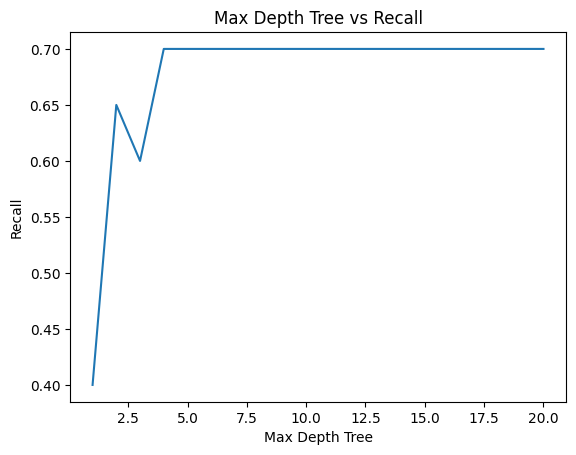

In [25]:
recall_df = pd.DataFrame(depth_recall, columns=['Max Depth Tree', 'Recall'])

ax = sns.lineplot(data=recall_df, x='Max Depth Tree', y='Recall')
ax.set_title('Max Depth Tree vs Recall')

Podemos ver que ya desde una máxima profundidad de 4, el `recall` se estabiliza en 70%. Dado lo anterior, preferimos mantener este **valor de profundidad igual a 4 como el elegido** dado que, en el caso de tener una profundidad muy grande el árbol, podemos caer en overfitting del modelo.

#### b. Optimización de hiperparámetro de nodos hoja

In [26]:
# Almacenamos en una lista la cantidad de nodos hojas de cada árbol vs el recall obtenido por cross validation dado ese parámetros
leaf_recall = list()
range_leaf = 20

# Probaremos la profundidad máxima del árbol con valores entre 1 y 20 nodos
for n in range(2, range_leaf+1):
    clf = DecisionTreeClassifier(max_leaf_nodes=n ,random_state=100)

    # Realizamos validación cruzada con K=10 y métrica Recall
    cv = cross_val_score(estimator=clf, X=X_train_scaled, y=y_train, cv=K, scoring=scoring_metric)
    recall_clf = np.mean(cv)
    leaf_recall.append((n, recall_clf))

leaf_recall

[(2, 0.4),
 (3, 0.45),
 (4, 0.6),
 (5, 0.7),
 (6, 0.7),
 (7, 0.7),
 (8, 0.7),
 (9, 0.7),
 (10, 0.7),
 (11, 0.7),
 (12, 0.7),
 (13, 0.7),
 (14, 0.7),
 (15, 0.7),
 (16, 0.7),
 (17, 0.7),
 (18, 0.7),
 (19, 0.7),
 (20, 0.7)]

Similarmente, graficamos los resultados.

Text(0.5, 1.0, 'Max Leaf Nodes Tree vs Recall')

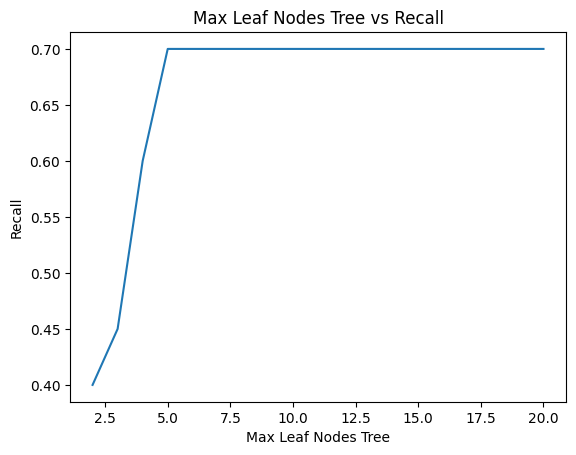

In [27]:
recall_leaf_df = pd.DataFrame(leaf_recall, columns=['Max Leaf Nodes Tree', 'Recall'])

ax = sns.lineplot(data=recall_leaf_df, x='Max Leaf Nodes Tree', y='Recall')
ax.set_title('Max Leaf Nodes Tree vs Recall')

#### c. Optimización de hiperparámetro de costo de complejidad 

In [28]:
# Almacenamos en una lista la complejidad de cada árbol vs el recall obtenido por cross validation dado ese parámetros
cp_recall = list()
range_ccp = 20

# Probaremos la profundidad máxima del árbol con valores entre 1 y 20 nodos
for n in range(range_ccp+1, 0, -1):
    alpha_n = 0.01 * n
    clf = DecisionTreeClassifier(ccp_alpha=alpha_n ,random_state=100)

    # Realizamos validación cruzada con K=10 y métrica Recall
    cv = cross_val_score(estimator=clf, X=X_train_scaled, y=y_train, cv=K, scoring=scoring_metric)
    recall_clf = np.mean(cv)
    cp_recall.append((alpha_n, recall_clf))

cp_recall

[(0.21, 0.0),
 (0.2, 0.0),
 (0.19, 0.0),
 (0.18, 0.0),
 (0.17, 0.1),
 (0.16, 0.3),
 (0.15, 0.3),
 (0.14, 0.4),
 (0.13, 0.4),
 (0.12, 0.4),
 (0.11, 0.4),
 (0.1, 0.4),
 (0.09, 0.4),
 (0.08, 0.4),
 (0.07, 0.4),
 (0.06, 0.45),
 (0.05, 0.45),
 (0.04, 0.45),
 (0.03, 0.7),
 (0.02, 0.7),
 (0.01, 0.7)]

Text(0.5, 1.0, 'Cost Complexity Alpha Tree vs Recall')

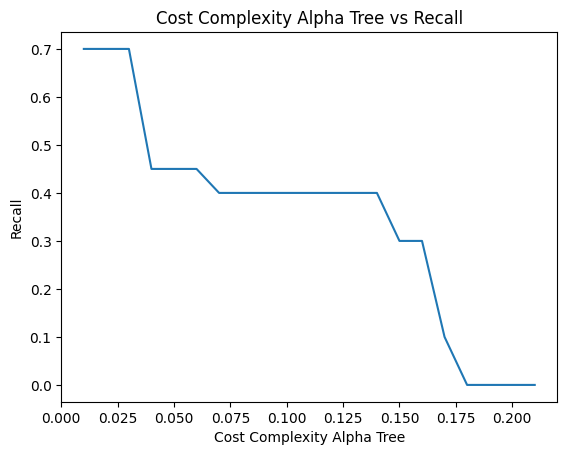

In [29]:
recall_cp_df = pd.DataFrame(cp_recall, columns=['Cost Complexity Alpha Tree', 'Recall'])

ax = sns.lineplot(data=recall_cp_df, x='Cost Complexity Alpha Tree', y='Recall')
ax.set_title('Cost Complexity Alpha Tree vs Recall')

Podemos ver gráficamente que **el valor óptimo del costo de complejidad es 0.03**. Ahora procedemos a generar el clasificador con los hiperparámetros `ccp_alpha`, `max_depth` y `max_leaf_nodes` optimizados y realizamos una predicción sobre los datos de test para medir el ajuste.

In [30]:
max_leaf_nodes = 5
max_depth = 4
ccp_alpha = 0.03

tree = DecisionTreeClassifier(max_depth=5, max_leaf_nodes=4, ccp_alpha=0.0, random_state=100)

En este caso, los algoritmos de árboles no son sensibles a distancias, sino que se basan en la entropía de los datos, por lo que no es necesario estandarizar los datos de prueba para este caso. Si estuviéramos ante el caso de un KNN, ahí si deberíamos estandarizar.

In [31]:
fitted_tree = tree.fit(X_train, y_train)

Generamos la predicción sobre los datos de prueba

In [32]:
y_pred = fitted_tree.predict(X_test)
y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1])

Calculamos el recall y otras métricas para medir el desempeño del modelo

In [33]:
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

print(f'''
Recall: {recall}
Accuracy: {accuracy}
Precision: {precision}
F1 Score: {f1}
AUC: {auc}''')


Recall: 0.625
Accuracy: 0.8333333333333334
Precision: 0.7142857142857143
F1 Score: 0.6666666666666666
AUC: 0.7670454545454546


Matriz de confusión

In [34]:
matrix = confusion_matrix(y_test, y_pred)
matrix

array([[20,  2],
       [ 3,  5]])

##### Comentarios de las métricas obtenidas

Una vez ya con todos las métricas, podemos generar algunas observaciones.

* De 30 observaciones, el modelo genera 20 Verdaderos Negativos, es decir, predice que la clase es 0 cuando realmente es 0 en 20 ocasiones
* De 30 observaciones, el modelo genera 2 Falsos Positivos, es decir, predice que la clase es 1 cuando realmente es 0 en 2 ocasiones
* De 30 observaciones, el modelo genera 3 Falsos Negativos, es decir, predice que la clase es 0 cuando realmente es 1 en 3 ocasiones
* De 30 observaciones, el modelo genera 5 Verdaderos Positivos, es decir, predice que la clase es 1 cuando realmente es 1 en 5 ocasiones 

El modelo tiene una exactitud (`Accuracy`) del 0.833, es decir, predice bien un 83.3% de los casos. Si bien esta métrica dice información sobre la calidad del ajuste, a veces tiende a estar sesgada en problemas de clases desbalanceadas, dado que para el modelo es muy sencillo clasificar la clase 0 debido a la desproporción para con la clase 1, por lo que el dato de `Accuracy` tiende a ser alto pero el dato de `Recall` tiende a ser considerablemente menor. En ciertos casos como el problema que estamos tratando ahora el costo de no predecir correctamente la clase 1 es muy alto, por lo que no sería un *approach* muy aconsejable el guiarse únicamente por `Accuracy`, sino más bien por el `Recall` o bien el `F1-Score` (promedio armónico entre `Recall` y `Precision`).

Por otra parte, podemos calcular la métrica de especificidad, la cual mide la capacidad del modelo de predecir correctamente la clase 0. En este caso está dada por `VN / (VN + FP)` siendo esta `20 / (20 + 2) = 0.90`. Con lo anterior podemos decir que dado nuestro `Recall (Sensibilidad)` y nuestra `Especificidad`, el modelo clasifica bien en un 90.9% la clase 0 y en un 62.5% la clase 1. Lo anterior está consolidado por el valor de la métrica `AUC`, siendo esta el área bajo la curva de la curva ROC (Sensibilidad vs 1 - Especificidad). Tenemos que `AUC=0.767` lo que nos indica también que el modelo, en una predicción, es capaz de distinguir correctamente si estamos ante la clase 0 o la clase 1 con un 76.7% de probabilidad.